In [2]:
%pylab inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.cm as cm
import matplotlib.figure as fig
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.ticker as mticker
import numpy as np
import numpy.ma as ma
from scipy.ndimage import label, generate_binary_structure
from collections import Counter
import xarray as xr 
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import os
import netCDF4 as nc
from netCDF4 import Dataset
# from mpl_toolkits.basemap import Basemap

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# according to Finnlayson-Pitts and Pitts, 
# Chemistry of the Upper and Lower Atmosphere, page 58.

# Calculate the diurnal cycle of the solar zenith angle in Miami (23°N) and Buenos Aires (35°S) during the summer solstice and at winter solstice. Discuss your results.

Miami (23°N) Summer Solstice June 21st

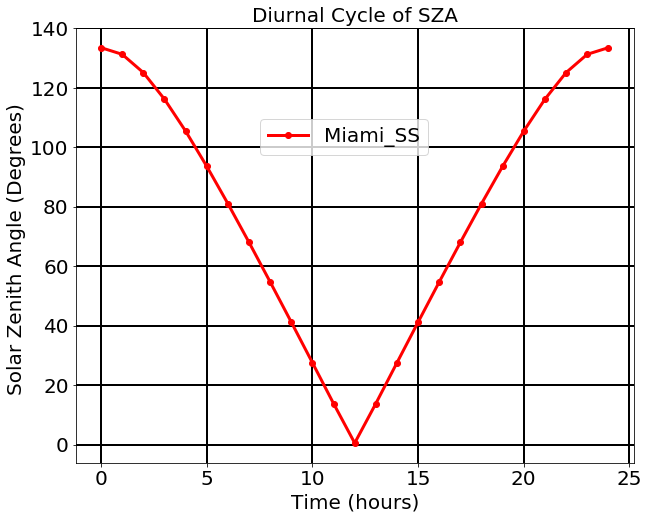

In [55]:
# Input:
#  t0:          Number of seconds since midnight from day0
#  day0:        Julian day of the year, 1 Jan is day = 0
#  lat:         Latitude in degrees (latidues north of the equator are positive)
#  lon:         Longitude in degrees (longitudes east of the Greenwich meridian are positive)
#  time_diff:   time difference in hours between local time and GMT  (e.g. for California, time_diff = 8)



# convert so that t is local time in hours and day is the current julian day
t0_1 = np.arange(0,25,1)
lat_1 = 23
lon_1 = -80

time_diff_1 = 4

# specify constants
pi =3.1415926535897932384


# equation of hour angle
h_1 = (pi / 180.) *15*(t0_1-12)

# solar declination
delta_1 = 23.5 *(pi / 180.)

# local hour angle in radians
# the argument has to be GMT

# GMT_1 = time_diff_1 - t_1
# t_h_1 = pi * ((GMT_1 / 12.) - 1. + lon_1 / 180.) + eqt_1

# convert lat and lon in radians      
latr_1 = lat_1 * pi / 180.
lonr_1 = lon_1 * pi / 180.

# sza in degree
theta_1 = 180. / pi * np.arccos((np.sin(delta_1) * np.sin(latr_1) + np.cos(delta_1) * np.cos(latr_1) * np.cos(h_1)))

fig = plt.figure(figsize=(10, 8))

plt.plot(t0_1,theta_1,'-ro',linewidth=3.0,label="Miami_SS")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Time (hours)',fontsize=20)
plt.ylabel('Solar Zenith Angle (Degrees) ',fontsize=20)
plt.title('Diurnal Cycle of SZA',fontsize=20)
plt.legend(bbox_to_anchor=(.65, .75), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)


Miami (23°N) Winter Solstice December 21st

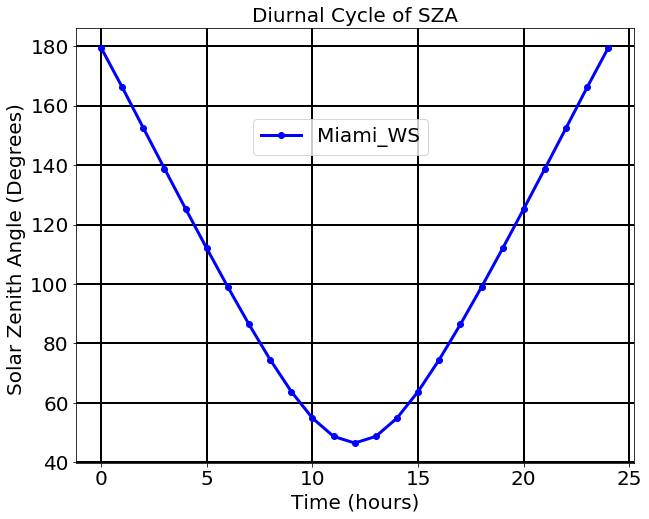

In [56]:
# Input:
#  t0:          Number of seconds since midnight from day0
#  day0:        Julian day of the year, 1 Jan is day = 0
#  lat:         Latitude in degrees (latidues north of the equator are positive)
#  lon:         Longitude in degrees (longitudes east of the Greenwich meridian are positive)
#  time_diff:   time difference in hours between local time and GMT  (e.g. for California, time_diff = 8)



# convert so that t is local time in hours and day is the current julian day
t0_2 = np.arange(0,25,1)
lat_2 = 23
lon_2 = -80

time_diff_2 = 4

# specify constants
pi =3.1415926535897932384


# equation of hour angle
h_2 = (pi / 180.) *15*(t0_2-12)

# solar declination
delta_2 = -23.5 *(pi / 180.)

# local hour angle in radians
# the argument has to be GMT

# GMT_1 = time_diff_1 - t_1
# t_h_1 = pi * ((GMT_1 / 12.) - 1. + lon_1 / 180.) + eqt_1

# convert lat and lon in radians      
latr_2 = lat_2 * pi / 180.
lonr_2 = lon_2 * pi / 180.

# sza in degree
theta_2 = 180. / pi * np.arccos((np.sin(delta_2) * np.sin(latr_2) + np.cos(delta_2) * np.cos(latr_2) * np.cos(h_2)))

fig = plt.figure(figsize=(10, 8))

plt.plot(t0_2,theta_2,'-bo',linewidth=3.0,label="Miami_WS")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Time (hours)',fontsize=20)
plt.ylabel('Solar Zenith Angle (Degrees) ',fontsize=20)
plt.title('Diurnal Cycle of SZA',fontsize=20)
plt.legend(bbox_to_anchor=(.65, .75), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)


Buenos Aires (35°S) Summer Solstice June 21st

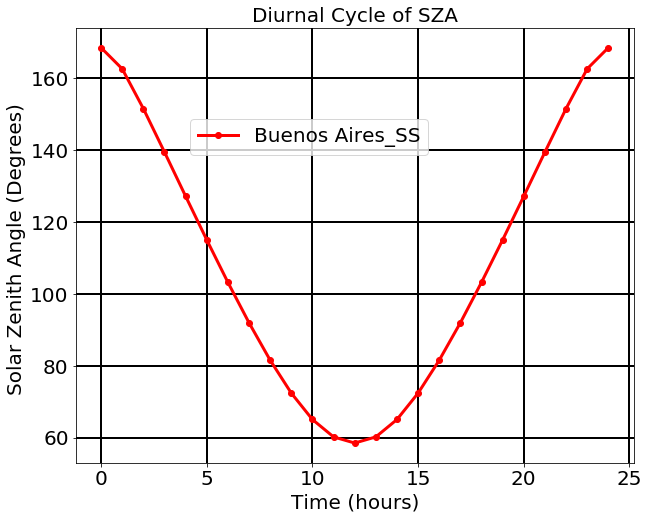

In [57]:
# Input:
#  t0:          Number of seconds since midnight from day0
#  day0:        Julian day of the year, 1 Jan is day = 0
#  lat:         Latitude in degrees (latidues north of the equator are positive)
#  lon:         Longitude in degrees (longitudes east of the Greenwich meridian are positive)
#  time_diff:   time difference in hours between local time and GMT  (e.g. for California, time_diff = 8)



# convert so that t is local time in hours and day is the current julian day
t0_3 = np.arange(0,25,1)
lat_3 = -35
lon_3 = -58

time_diff_3 = 3

# specify constants
pi =3.1415926535897932384


# equation of hour angle
h_3 = (pi / 180.) *15*(t0_3-12)

# solar declination
delta_3 = 23.5 *(pi / 180.)

# local hour angle in radians
# the argument has to be GMT

# GMT_1 = time_diff_1 - t_1
# t_h_1 = pi * ((GMT_1 / 12.) - 1. + lon_1 / 180.) + eqt_1

# convert lat and lon in radians      
latr_3 = lat_3 * pi / 180.
lonr_3 = lon_3 * pi / 180.

# sza in degree
theta_3 = 180. / pi * np.arccos((np.sin(delta_3) * np.sin(latr_3) + np.cos(delta_3) * np.cos(latr_3) * np.cos(h_3)))

fig = plt.figure(figsize=(10, 8))

plt.plot(t0_3,theta_3,'-ro',linewidth=3.0,label="Buenos Aires_SS")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Time (hours)',fontsize=20)
plt.ylabel('Solar Zenith Angle (Degrees) ',fontsize=20)
plt.title('Diurnal Cycle of SZA',fontsize=20)
plt.legend(bbox_to_anchor=(.65, .75), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)


Buenos Aires (35°S) Winter Solstice December 21st

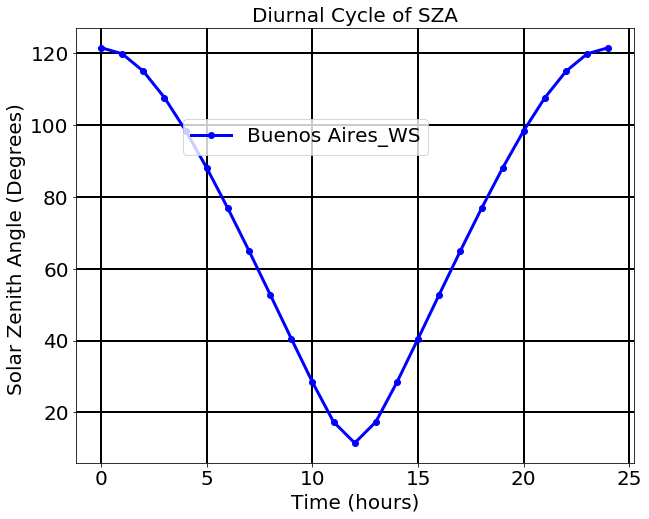

In [58]:
# Input:
#  t0:          Number of seconds since midnight from day0
#  day0:        Julian day of the year, 1 Jan is day = 0
#  lat:         Latitude in degrees (latidues north of the equator are positive)
#  lon:         Longitude in degrees (longitudes east of the Greenwich meridian are positive)
#  time_diff:   time difference in hours between local time and GMT  (e.g. for California, time_diff = 8)



# convert so that t is local time in hours and day is the current julian day
t0_4 = np.arange(0,25,1)
lat_4 = -35
lon_4 = -58

time_diff_4 = 4

# specify constants
pi =3.1415926535897932384


# equation of hour angle
h_4 = (pi / 180.) *15*(t0_4-12)

# solar declination
delta_4 = -23.5 *(pi / 180.)

# local hour angle in radians
# the argument has to be GMT

# GMT_1 = time_diff_1 - t_1
# t_h_1 = pi * ((GMT_1 / 12.) - 1. + lon_1 / 180.) + eqt_1

# convert lat and lon in radians      
latr_4 = lat_4 * pi / 180.
lonr_4 = lon_4 * pi / 180.

# sza in degree
theta_4 = 180. / pi * np.arccos((np.sin(delta_4) * np.sin(latr_4) + np.cos(delta_4) * np.cos(latr_4) * np.cos(h_4)))

fig = plt.figure(figsize=(10, 8))

plt.plot(t0_4,theta_4,'-bo',linewidth=3.0,label="Buenos Aires_WS")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Time (hours)',fontsize=20)
plt.ylabel('Solar Zenith Angle (Degrees) ',fontsize=20)
plt.title('Diurnal Cycle of SZA',fontsize=20)
plt.legend(bbox_to_anchor=(.65, .75), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)


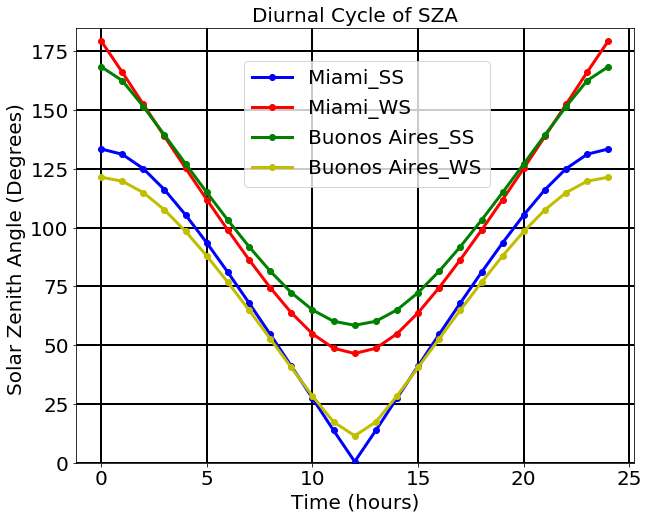

In [59]:
# Input:
#  t0:          Number of seconds since midnight from day0
#  day0:        Julian day of the year, 1 Jan is day = 0
#  lat:         Latitude in degrees (latidues north of the equator are positive)
#  lon:         Longitude in degrees (longitudes east of the Greenwich meridian are positive)
#  time_diff:   time difference in hours between local time and GMT  (e.g. for California, time_diff = 8)



fig = plt.figure(figsize=(10, 8))

plt.plot(t0_1,theta_1,'-bo',linewidth=3.0,label="Miami_SS")
plt.plot(t0_2,theta_2,'-ro',linewidth=3.0,label="Miami_WS")
plt.plot(t0_3,theta_3,'-go',linewidth=3.0,label="Buonos Aires_SS")
plt.plot(t0_4,theta_4,'-yo',linewidth=3.0,label="Buonos Aires_WS")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,185)
plt.xlabel('Time (hours)',fontsize=20)
plt.ylabel('Solar Zenith Angle (Degrees) ',fontsize=20)
plt.title('Diurnal Cycle of SZA',fontsize=20)
plt.legend(bbox_to_anchor=(.76, .78), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)


# Calculate the average daily solar insolation at the top of the atmosphere, as a function of the declination angle for three different latitudes 0°N, 40°N and 40°S. Plot and discuss your results.

0°N

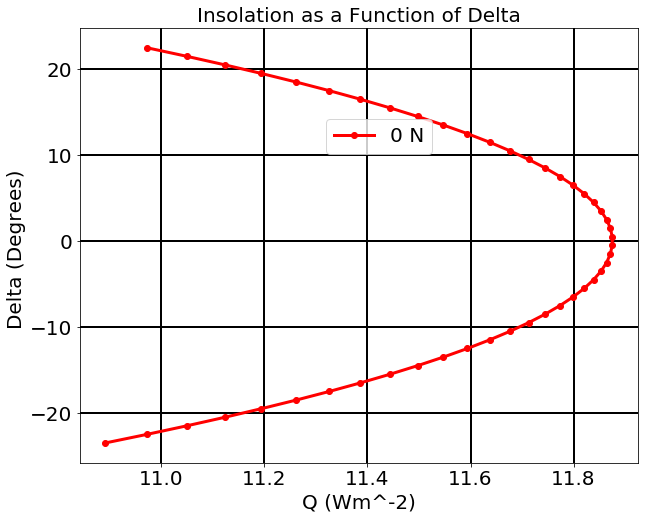

In [60]:
# Input:
#  t0:          Number of seconds since midnight from day0
#  day0:        Julian day of the year, 1 Jan is day = 0
#  lat:         Latitude in degrees (latidues north of the equator are positive)
#  lon:         Longitude in degrees (longitudes east of the Greenwich meridian are positive)
#  time_diff:   time difference in hours between local time and GMT  (e.g. for California, time_diff = 8)



# convert so that t is local time in hours and day is the current julian day
t0_5 = np.arange(0,25,1)
day0_5 = np.arange(0,365,1)
lat_5 = 0
lon_5 = -58

time_diff_5 = 4

# t_2 = mod(t0_2/3600.,24)
# day_2 = day0_2 + floor(t0_2/3600./24.)

# specify constants
pi = 3.1415926535897932384
S0 = 1361
# for declination angle
# a0 = .006918
# a1 = -.399912
# a2 = -.006758
# a3 = -.002697
# b1 = .070257
# b2 = .000907
# b3 = .001480

# convert lat and lon in radians      
latr_5 = lat_5 * pi / 180.
lonr_5 = lon_5 * pi / 180.

# equation of hour angle
h_5 = (pi / 180.) *15*(t0_5-12)

# solar declination
# delta_2 = a0 + a1*cos(n_day_2) + a2 * sin(n_day_2*2) + a3 * cos(2*n_day_2) + b1 * sin(n_day_2) + b2 * cos(n_day_2*2) + b3 * sin(3*n_day_2)
delta_5 = np.arange(-23.5,23.5,1)*(pi / 180.)

delta_5_deg = np.arange(-23.5,23.5,1)

h0_5 = (pi / 180.) *np.arccos((-np.tan(latr_5)*np.tan(delta_5)))
# local hour angle in radians
# the argument has to be GMT

# GMT_1 = time_diff_1 - t_1
# t_h_1 = pi * ((GMT_1 / 12.) - 1. + lon_1 / 180.) + eqt_1

# sza in degree
# theta_5 = 180. / pi * np.arccos((np.sin(delta_5) * np.sin(latr_5) + np.cos(delta_5) * np.cos(latr_5) * np.cos(h_5)))

Q_5 = (S0/pi) * (1)*(h0_5*np.sin(latr_5)*np.sin(delta_5) + np.cos(latr_5)*np.cos(delta_5)*sin(h0_5))

fig = plt.figure(figsize=(10, 8))

plt.plot(Q_5,delta_5_deg,'-ro',linewidth=3.0,label="0 N")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Q (Wm^-2)',fontsize=20)
plt.ylabel('Delta (Degrees) ',fontsize=20)
plt.title('Insolation as a Function of Delta',fontsize=20)
plt.legend(bbox_to_anchor=(.65, .75), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)


40°N

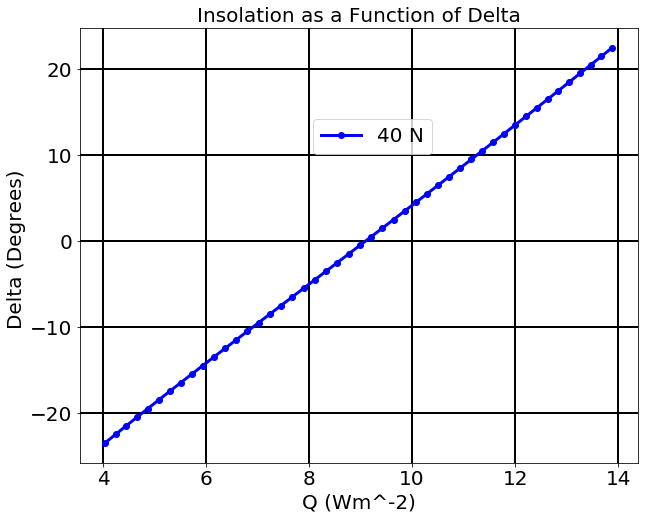

In [61]:
# convert so that t is local time in hours and day is the current julian day
t0_6 = np.arange(0,25,1)
day0_6 = np.arange(0,365,1)
lat_6 = 40
lon_6 = -58

time_diff_6 = 4

# t_2 = mod(t0_2/3600.,24)
# day_2 = day0_2 + floor(t0_2/3600./24.)

# specify constants
pi = 3.1415926535897932384
S0 = 1361
# for declination angle
# a0 = .006918
# a1 = -.399912
# a2 = -.006758
# a3 = -.002697
# b1 = .070257
# b2 = .000907
# b3 = .001480

# convert lat and lon in radians      
latr_6 = lat_6 * pi / 180.
lonr_6 = lon_6 * pi / 180.

# equation of hour angle
h_6 = (pi / 180.) *15*(t0_6-12)

# solar declination
# delta_2 = a0 + a1*cos(n_day_2) + a2 * sin(n_day_2*2) + a3 * cos(2*n_day_2) + b1 * sin(n_day_2) + b2 * cos(n_day_2*2) + b3 * sin(3*n_day_2)
delta_6 = np.arange(-23.5,23.5,1)*(pi / 180.)

delta_6_deg = np.arange(-23.5,23.5,1)

h0_6 = (pi / 180.) *np.arccos((-np.tan(latr_6)*np.tan(delta_6)))
# local hour angle in radians
# the argument has to be GMT

# GMT_1 = time_diff_1 - t_1
# t_h_1 = pi * ((GMT_1 / 12.) - 1. + lon_1 / 180.) + eqt_1

# sza in degree
# theta_6 = 180. / pi * np.arccos((np.sin(delta_6) * np.sin(latr_6) + np.cos(delta_6) * np.cos(latr_6) * np.cos(h_6)))

Q_6 = (S0/pi) * (1)*(h0_6*np.sin(latr_6)*np.sin(delta_6) + np.cos(latr_6)*np.cos(delta_6)*sin(h0_6))

fig = plt.figure(figsize=(10, 8))

plt.plot(Q_6,delta_6_deg,'-bo',linewidth=3.0,label="40 N")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Q (Wm^-2)',fontsize=20)
plt.ylabel('Delta (Degrees) ',fontsize=20)
plt.title('Insolation as a Function of Delta',fontsize=20)
plt.legend(bbox_to_anchor=(.65, .75), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)


40°S

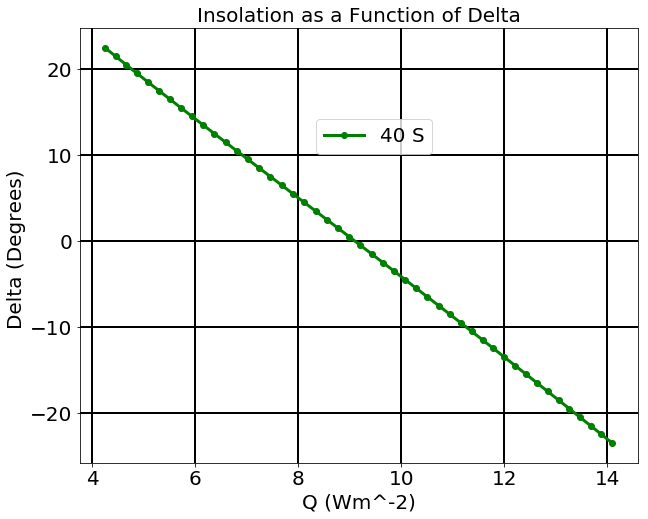

In [62]:
# convert so that t is local time in hours and day is the current julian day
t0_7 = np.arange(0,25,1)
day0_7 = np.arange(0,365,1)
lat_7 = -40
lon_7 = -58

time_diff_7 = 4

# t_2 = mod(t0_2/3600.,24)
# day_2 = day0_2 + floor(t0_2/3600./24.)

# specify constants
pi = 3.1415926535897932384
S0 = 1361
# for declination angle
# a0 = .006918
# a1 = -.399912
# a2 = -.006758
# a3 = -.002697
# b1 = .070257
# b2 = .000907
# b3 = .001480

# convert lat and lon in radians      
latr_7 = lat_7 * pi / 180.
lonr_7 = lon_7 * pi / 180.

# equation of hour angle
h_7 = (pi / 180.) *15*(t0_7-12)

# solar declination
# delta_2 = a0 + a1*cos(n_day_2) + a2 * sin(n_day_2*2) + a3 * cos(2*n_day_2) + b1 * sin(n_day_2) + b2 * cos(n_day_2*2) + b3 * sin(3*n_day_2)
delta_7 = np.arange(-23.5,23.5,1)*(pi / 180.)

delta_7_deg = np.arange(-23.5,23.5,1)

h0_7 = (pi / 180.) *np.arccos((-np.tan(latr_7)*np.tan(delta_7)))
# local hour angle in radians
# the argument has to be GMT

# GMT_1 = time_diff_1 - t_1
# t_h_1 = pi * ((GMT_1 / 12.) - 1. + lon_1 / 180.) + eqt_1

# sza in degree
# theta_6 = 180. / pi * np.arccos((np.sin(delta_6) * np.sin(latr_6) + np.cos(delta_6) * np.cos(latr_6) * np.cos(h_6)))

Q_7 = (S0/pi) * (1)*(h0_7*np.sin(latr_7)*np.sin(delta_7) + np.cos(latr_7)*np.cos(delta_7)*sin(h0_7))

fig = plt.figure(figsize=(10, 8))

plt.plot(Q_7,delta_7_deg,'-go',linewidth=3.0,label="40 S")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Q (Wm^-2)',fontsize=20)
plt.ylabel('Delta (Degrees) ',fontsize=20)
plt.title('Insolation as a Function of Delta',fontsize=20)
plt.legend(bbox_to_anchor=(.65, .75), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)


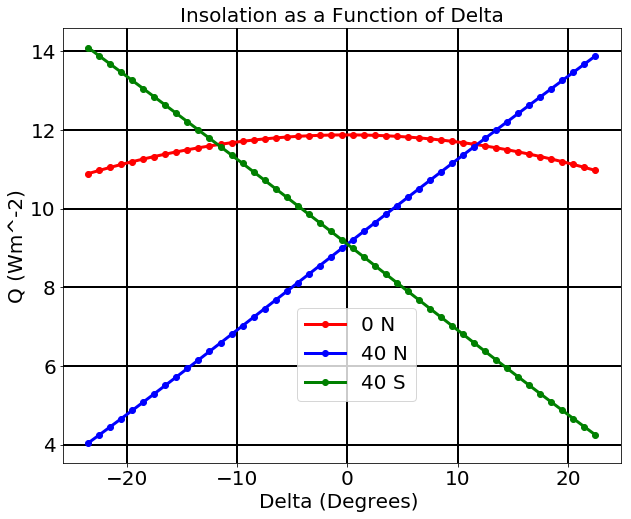

In [63]:
fig = plt.figure(figsize=(10, 8))
plt.plot(delta_5_deg,Q_5,'-ro',linewidth=3.0,label="0 N")
plt.plot(delta_6_deg,Q_6,'-bo',linewidth=3.0,label="40 N")
plt.plot(delta_7_deg,Q_7,'-go',linewidth=3.0,label="40 S")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Q (Wm^-2)',fontsize=20)
plt.xlabel('Delta (Degrees) ',fontsize=20)
plt.title('Insolation as a Function of Delta',fontsize=20)
plt.legend(bbox_to_anchor=(.65, .25), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)

# Merra Data

In [3]:
#ds = xr.open_mfdataset('/Users/engelse2/Desktop/ATMS507/MERRA/MERRA*.prod.assim.instM_3d_asm_Cp.*')
ds = xr.open_mfdataset('/Users/engelse2/Desktop/ATMS507/MERRA2_JAN2017/MERRA2_400.inst3_3d_asm_Np.20170*')

In [28]:
ds

<xarray.Dataset>
Dimensions:  (lat: 361, lev: 42, lon: 576, time: 248)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 -177.5 -176.9 -176.2 ...
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 -87.5 -87.0 -86.5 ...
  * lev      (lev) float64 1e+03 975.0 950.0 925.0 900.0 875.0 850.0 825.0 ...
  * time     (time) datetime64[ns] 2017-01-01 2017-01-01T03:00:00 ...
Data variables:
    EPV      (time, lev, lat, lon) float64 dask.array<shape=(248, 42, 361, 576), chunksize=(8, 42, 361, 576)>
    H        (time, lev, lat, lon) float64 dask.array<shape=(248, 42, 361, 576), chunksize=(8, 42, 361, 576)>
    O3       (time, lev, lat, lon) float64 dask.array<shape=(248, 42, 361, 576), chunksize=(8, 42, 361, 576)>
    OMEGA    (time, lev, lat, lon) float64 dask.array<shape=(248, 42, 361, 576), chunksize=(8, 42, 361, 576)>
    PHIS     (time, lat, lon) float64 dask.array<shape=(248, 361, 576), chunksize=(8, 361, 576)>
    PS       (time, lat, lon) float64 dask.array<shape=

In [29]:
ds.lat.shape

(361,)

In [32]:
ds_500

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 576, time: 248)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 -177.5 -176.9 -176.2 ...
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 -87.5 -87.0 -86.5 ...
    lev      float64 500.0
  * time     (time) datetime64[ns] 2017-01-01 2017-01-01T03:00:00 ...
Data variables:
    EPV      (time, lat, lon) float64 dask.array<shape=(248, 361, 576), chunksize=(8, 361, 576)>
    H        (time, lat, lon) float64 dask.array<shape=(248, 361, 576), chunksize=(8, 361, 576)>
    O3       (time, lat, lon) float64 dask.array<shape=(248, 361, 576), chunksize=(8, 361, 576)>
    OMEGA    (time, lat, lon) float64 dask.array<shape=(248, 361, 576), chunksize=(8, 361, 576)>
    PHIS     (time, lat, lon) float64 dask.array<shape=(248, 361, 576), chunksize=(8, 361, 576)>
    PS       (time, lat, lon) float64 dask.array<shape=(248, 361, 576), chunksize=(8, 361, 576)>
    QI       (time, lat, lon) float64 dask.array<shape=(248, 361, 576),

In [51]:
# Indexing arrays

ds_500 = ds.sel(time=slice('2017-01-01', '2018-01-02')).isel(lev=16)




# Vavg = ds_500['V'].groupby('time.month').mean('time')
# Qvavg = ds_500['QV'].groupby('time.month').mean('time')

Vavg = ds_500['V'].mean('time')
Qvavg = ds_500['QV'].mean('time')
QvVavg = Vavg*Qvavg

V = ds_500['V']
Qv = ds_500['QV']
QvV = Qv*V

Vprime = V-Vavg
Qvprime = Qv-Qvavg
QvVprime = (QvV-QvVavg)

QvVprime_mean = QvVprime.mean('time')



lons = ds['lon']
lats = ds['lat']

In [53]:
QvVprime_mean.shape

(361, 576)

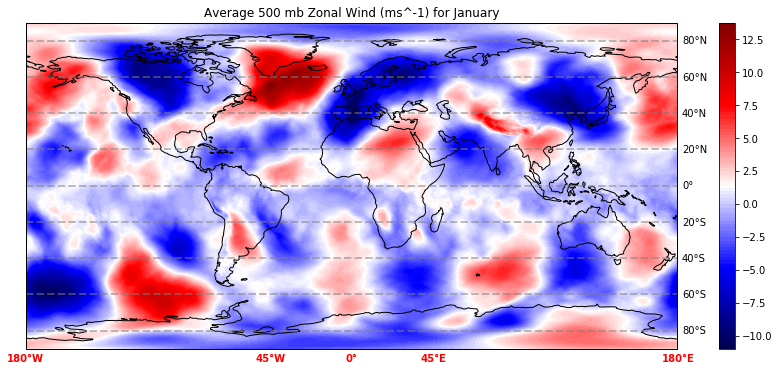

In [42]:
plt.figure(figsize=(15,6))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

plt.title('Average 500 mb Zonal Wind (ms^-1) for January')

img = plt.contourf(lons,lats,Vavg, 100, cmap='seismic',transform=ccrs.PlateCarree())

plt.colorbar(img)
plt.show(img)


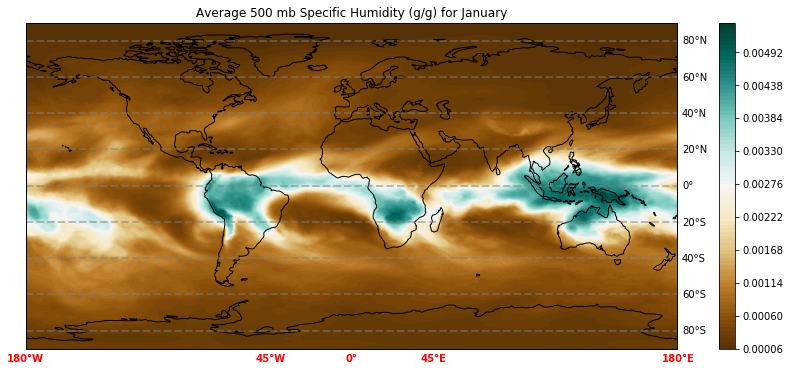

In [35]:
plt.figure(figsize=(15,6))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

plt.title('Average 500 mb Specific Humidity (g/g) for January')

img = plt.contourf(lons,lats,Qvavg, 100, cmap='BrBG',
             transform=ccrs.PlateCarree())

plt.colorbar(img)
plt.show(img)


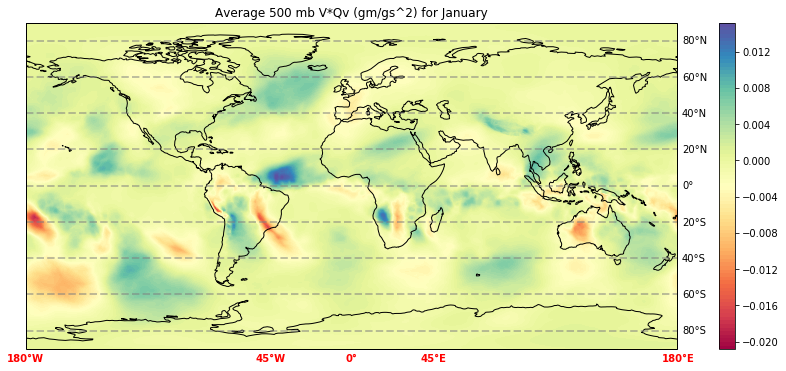

In [41]:
plt.figure(figsize=(15,6))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

plt.title('Average 500 mb V*Qv (gm/gs^2) for January')

img = plt.contourf(lons,lats,QvVavg, 100, cmap='Spectral',
             transform=ccrs.PlateCarree())

plt.colorbar(img)
plt.show(img)


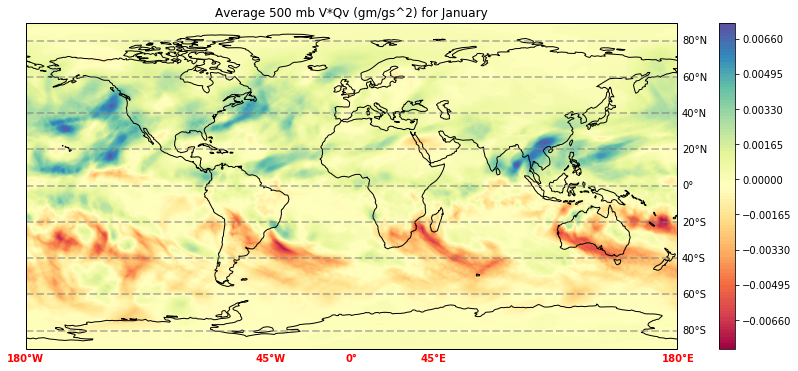

In [54]:
plt.figure(figsize=(15,6))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

plt.title('Average 500 mb V*Qv (gm/gs^2) for January')

img = plt.contourf(lons,lats,QvVprime_mean, 100, cmap='Spectral',
             transform=ccrs.PlateCarree())

plt.colorbar(img)
plt.show(img)


In [ ]:
# # Input:
# #  t0:          Number of seconds since midnight from day0
# #  day0:        Julian day of the year, 1 Jan is day = 0
# #  lat:         Latitude in degrees (latidues north of the equator are positive)
# #  lon:         Longitude in degrees (longitudes east of the Greenwich meridian are positive)
# #  time_diff:   time difference in hours between local time and GMT  (e.g. for California, time_diff = 8)



# # convert so that t is local time in hours and day is the current julian day
# t0_2 = np.arange(30585600,30672000,3600)
# day0_2 = 354
# lat_2 = 23
# lon_2 = -80

# time_diff_2 = 4

# t_2 = mod(t0_2/3600.,24)
# day_2 = day0_2 + floor(t0_2/3600./24.)

# # specify constants
# pi =3.1415926535897932384

# a0 = 7.5e-5
# a1 = 1.868e-3
# a2 = -3.2077e-2
# a3 = -1.4615e-2
# a4 = -4.0849e-2

# b0 = 6.918e-3
# b1 = -0.399912
# b2 = 0.070257
# b3 = -6.758e-3
# b4 = 9.07e-4
# b5 = -2.697e-3
# b6 = 1.48e-3

# n_day_2 = 2. * pi * day_2 / 365.

# # equation of time
# eqt_2 = a0 + a1 * cos(n_day_2) + a2 * sin(n_day_2) + a3 * cos(2*n_day_2) + a4 * sin(2*n_day_2)

# # solar declination
# delta_2 = b0 + b1*cos(n_day_2) + b2 * sin(n_day_2) + b3 * cos(2*n_day_2) + b4 * sin(2*n_day_2) + b5 * cos(3*n_day_2) + b6 * sin(3*n_day_2)

# # local hour angle in radians
# # the argument has to be GMT

# GMT_2 = time_diff_2 - t_2
# t_h_2 = pi * ((GMT_2 / 12.) - 1. + lon_2 / 180.) + eqt_2

# # convert lat and lon in radians      
# latr_2 = lat_2 * pi / 180.
# lonr_2 = lon_2 * pi / 180.

# # sza in degree
# theta_2 = 180. / pi * np.arccos((np.sin(delta_2) * np.sin(latr_2) + np.cos(delta_2) * np.cos(latr_2) * np.cos(t_h_2)))

# fig = plt.figure(figsize=(10, 8))

# plt.plot(t_2,theta_2,'-bo',linewidth=3.0,label="Miami_WS")
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.xlabel('Time (hours)',fontsize=20)
# plt.ylabel('Solar Zenith Angle (Degrees) ',fontsize=20)
# plt.title('Diurnal Cycle of SZA',fontsize=20)
# plt.legend(bbox_to_anchor=(.65, .35), loc=7, prop={'size': 20})
# plt.grid(color='black', linestyle='-', linewidth=2)
